In [ ]:
import pandas as pd
df = pd.read_csv ('data.csv')
df.head()

In [ ]:
df = df[df.Surface != 'None']
nb_pieces = df['Pièces'].str.split(' ').str.get(0).astype(int)
df['nb_pieces'] = nb_pieces
nb_chambres = df['Chambres'].str.split(' ').str.get(0).astype(int)
df['nb_chambres'] = nb_chambres
nb_salles_bain = df['Salles_bain'].str.split(' ').str.get(0).astype(int)
df['nb_salles_bain'] = nb_salles_bain
Surface_metre_carre = df['Surface'].str.split(' ').str.get(0)
df['Surface_metre_carre'] = Surface_metre_carre.astype(int)
df['Prix'] = df['Prix'].str.replace('\xa0', '').astype(int)
df['Ville'] = df['Adresse'].str.split().str.get(-1)
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lee = LabelEncoder()
df['Id_ville']  = 1+le.fit_transform(df.Ville)
df['Id_type']  = 1+lee.fit_transform(df.Type)
df

In [ ]:
from sklearn import preprocessing
import numpy as np 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
X= df[['Id_type','Surface_metre_carre','Id_ville','nb_pieces','nb_chambres','nb_salles_bain']] 
y= df.Prix
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True) 

In [ ]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X_train,y_train) 

In [ ]:
predection = model.predict(X_test)

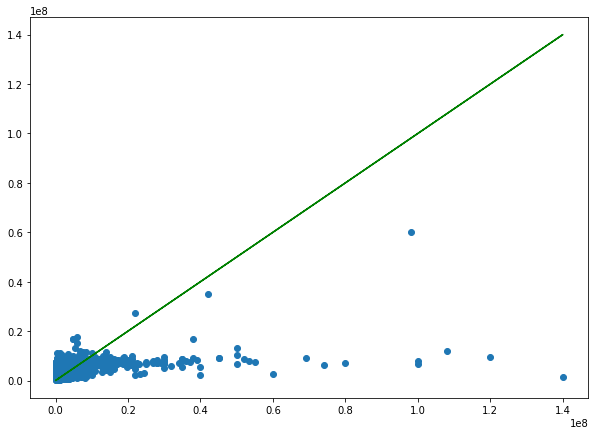

In [165]:
plt.figure(figsize=(10,7)) 
plt.scatter(y_test , predection)
plt.plot(y_test , y_test,color='g')

In [157]:
from sklearn import metrics 
mean_sq_err = metrics.mean_squared_error(y_test , predection) 
RMSE = np.sqrt(mean_sq_err) 
RMSE

6565375.562739314

In [148]:
X2= df[['Id_type','Surface_metre_carre','Id_ville','nb_chambres','nb_salles_bain']] 
y2= df.Prix
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,shuffle=True) 


In [149]:
model2 = LinearRegression() 
model2.fit(X2_train,y2_train) 

LinearRegression()

In [150]:
predection2 = model2.predict(X2_test)

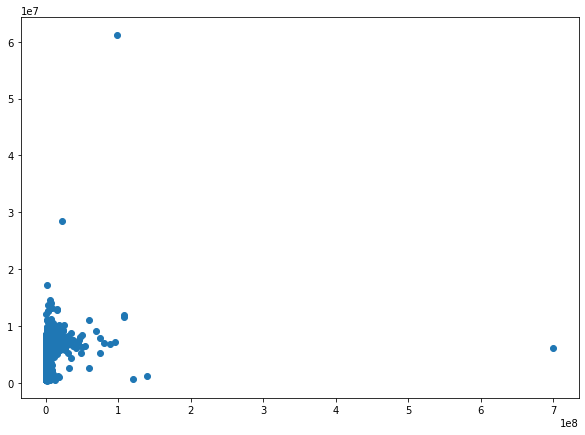

In [166]:
plt.figure(figsize=(10,7)) 
plt.scatter(y2_test , predection2) 

In [152]:
mean_sq_err2 = metrics.mean_squared_error(y2_test , predection2) 
RMSE2 = np.sqrt(mean_sq_err2) 
RMSE2

13912594.932500187